#  Graph Maker 
Just Write the folder below where the data resides and this will output a figure for you.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
import pickle

# Destination
path = './Images/BDL4VaryingStates'
save_fig_path = './Images/BDL4VaryingStates/figure.png'

In [29]:
# Default Arguments
class Args:
  xres = 100
  length = 10000# Number of transitions in continuous chain 
  state_limit = 7#Inclusive
  init_state = 0
  num_samples = 4
  detection_guesses =1000
args = Args()

In [30]:
# Load Data
num_err = open(os.path.join(path,'num_error.pkl'),'rb')
theo_err = open(os.path.join(path,'theo_error.pkl'),'rb')

num_error = pickle.load(num_err)
theo_error = pickle.load(theo_err)

if os.path.exists(os.path.join(path,'args.pkl')):
    args_path = open(os.path.join(path,'args.pkl'),'rb')
    pickle.load(args_path) 

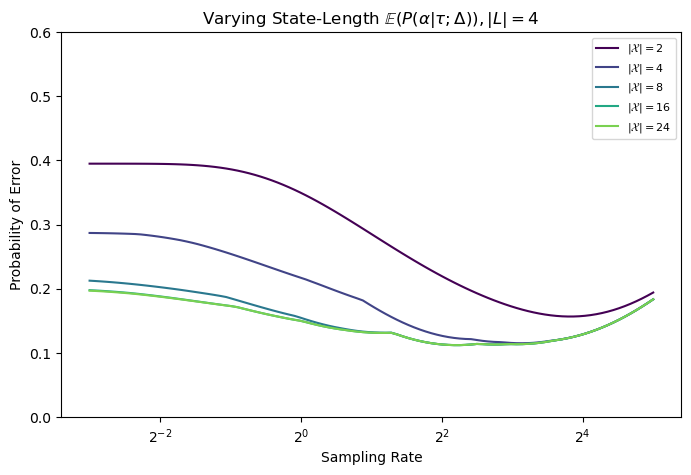

In [37]:

samp_rates = np.logspace(-3,5,args.xres, base=2)

fig = plt.figure(figsize=(8,5))
plt.tight_layout()
for i,(k,e) in enumerate(num_error.items()):
    color = plt.get_cmap()(i/len(num_error))[:-1]
    #color = i*np.array([0.3,0.7,0.9])
    #plt.plot(samp_rates, e, label='$E_n, |S| $= '+k,c=color,alpha=0.3)
    plt.plot(samp_rates, theo_error[k],c=color, label='$|\\mathcal{X}|=$'+k)
    i += 0.1
plt.title('Varying State-Length $\mathbb{E}(P(\\alpha | \\tau;\Delta )), |L| = 4$ ')
plt.xscale('log', base=2)
plt.legend(prop={'size':8})
plt.xlabel('Sampling Rate')
plt.ylabel('Probability of Error')
plt.ylim(0,0.6)
if save_fig_path != '':
    plt.savefig(save_fig_path,dpi=300)
plt.show()